# Settings

In [9]:
""" Spectrogram """
import numpy as np
import librosa as lr
import matplotlib.pyplot as plt
import soundfile as sf
import utils

plt.rcParams["figure.figsize"] = (5,5)
plt.rc('font', size=20)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick',labelsize=25)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=50)
plt.rc('figure', autolayout=True)

sr = 16000
win_time = 0.02
# Window Sample의 길이 표현
win_len = int(win_time * sr)
hop_len = int(win_len * 0.5)
print("Window Len:",win_len)
print("Hop Len:",hop_len)

Window Len: 320
Hop Len: 160


Loaded: yonseicrop.wav, Shape: (18000,), Original sr: 16000
Loaded: yonseicrop.wav, Shape: (18000,), Original sr: 16000
18000


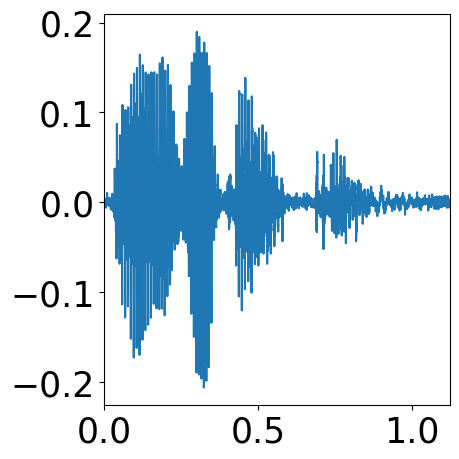

In [10]:
### Read wav file

# file_path = "results/sa.wav"
# file_path = "results/wu.wav"
# file_path = "SA_TEST_baseline_ver02\SA_TEST_baseline_ver02\SA_TEST01_WAV\Sa.wav"
file_path = "yonseicrop.wav"

yr,ori_sr = lr.load(file_path,sr=sr)
print(f"Loaded: {file_path}, Shape: {np.array(yr).shape}, Original sr: {ori_sr}")

### Read Audio Files
yr1,ori_sr = lr.load(file_path,sr=sr)
print(f"Loaded: {file_path}, Shape: {np.array(yr1).shape}, Original sr: {ori_sr}")

### Clip waveform
if file_path == "results/sa.wav":
    yr = yr1[:15000]

elif file_path == "results/wu.wav":
    yr = yr1[3000:25000]

elif file_path == "SA_TEST_baseline_ver02\SA_TEST_baseline_ver02\SA_TEST01_WAV\Sa.wav":
    yr = yr1[9800:18000]
elif file_path == "yonsei2.wav":
    yr = yr1[4000:22000]

# Time axis
time = np.linspace(0,len(yr),len(yr),endpoint=False)/sr
plt.plot(time,yr)
# plt.plot(yr)
# plt.ylim(bottom=-0.135, top=0.05)
plt.xlim(0,time[-1])

samplenum = len(yr)
print(samplenum)

In [11]:
# # # Write into wav

# result_folder = "results"
# save_path = "yonseinew.wav"
# # print(save_path)
# sf.write(save_path, yr, sr)

# Utility

In [21]:
# class FrameExtractor:
#     def __init__(self, function, win_len, hop_len):
#         self.function = function
#         self.win_len = win_len
#         self.hop_len = hop_len
#         self.total_frames = 0
#         self.hamm_window = lr.filters.get_window(window="hamming", Nx=self.win_len)
#         self.rect_window = lr.filters.get_window(window="rectangular", Nx=self.win_len)
        
#     def extract_frames(self, win_type="rectangular"):
#         # Make window
        
#         frames=[]
#         for n in range(0, len(self.function), self.hop_len):
#             # 마지막에서 끝을 clip하고 난 후 return 한다
#             if n + self.win_len > len(self.function):
#                 break
            
#             region = self.function[n:n + self.win_len]
#             if win_type == "hamming":
#                 region = region * self.hamm_window
            
#             self.total_frames += 1
#             frames.append(region)
#         print(f"From {len(self.function)} samples, total {self.total_frames} frames are generated")
#         return frames
    
#     # input function의 sample no 를 넣어, 해당하는 제일 작은 frame index를 찾아주는 함수
#     # frame index 와 rectangular windowed region 을 반환한다
#     def frame_index_finder(self, search_index):
#         frameindex =0
#         for n in range(0, len(self.function), self.hop_len):
#             if (search_index >= n) and (search_index < n+self.win_len):
#                 region = self.function[n:n + self.win_len]
#                 region = region * self.rect_window
#                 break
#             frameindex += 1 
#             # n == hoplen * index : hoplen * index + winlen
#         return frameindex, region
        
#     #win, hop len은 class 생성할 때 이미 지정함
#     def STFT(self,win_type="rectangular",dft_len=512):
#         # For every frames
#         frames = self.extract_frames(win_type)
#         specgram = np.zeros([dft_len//2 +1, self.total_frames],dtype=complex)
#         for frameindex,frame in enumerate(frames):
#             # 각 frame 마다 FFT 실행 후 0 - 0.5Fs 추출
#             freqbin = (np.fft.fftshift(np.fft.fft(frame,dft_len)))
#             # ttt = freqbin[:len(freqbin)//2 +1]
#             specgram[:,frameindex] = freqbin[:len(freqbin)//2 +1]
#         return specgram
        

        
        
        
        
#     # index에 해당하는 frame이 들어있는 2중 list return

# # function_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# # win_len = 3
# # hop_len = 2

# # frame_extractor = FrameExtractor(function_data, win_len, hop_len)
# # frames = frame_extractor.extract_frames()
# # print(frame_extractor.total_frames)
# # print(frames)

In [22]:
# 신호를 FrameExtractor을 이용해서 frame으로 쪼개봅시다
frame_extractor = utils.FrameExtractor(yr, win_len, hop_len)
frames = frame_extractor.extract_frames()

# 각 frame 내부에서 short-time analysis
plt.plot(yr)
plt.show()

unv_index = frame_extractor.frame_index_finder(1500)
v_index = frame_extractor.frame_index_finder(5000)
frame1 = frames[unv_index]
frame2 = frames[v_index]
plt.plot(frame1)
plt.figure()
plt.plot(frame2)
plt.figure()

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

ValueError: x and y must have same first dimension, but have shapes (257,) and (512,)

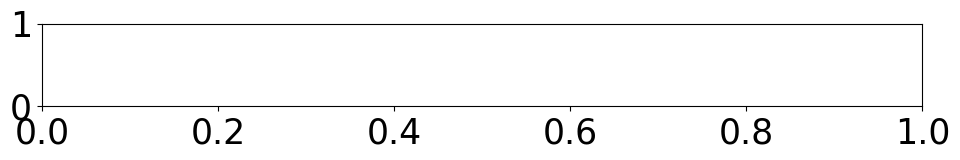

In [20]:
# ## 주어진 Frame 속에서 FFT 계산 후 spectrum 그려내기

# framelist = [frame1, frame2]
# fflist = [np.fft.fftshift(np.fft.fft(ff)) for ff in framelist]
# freq1 = np.fft.fftshift(np.fft.fftfreq(len(ff),d=1/sr))

# for ff in fflist:
#     plt.figure(figsize=[10,2])
#     plt.plot(freq1, np.abs(ff))
#     plt.xlabel("Hertz (Hz)")
#     plt.show()


# Speectrum

From 18000 samples, total 561 frames are generated
startind: 1440


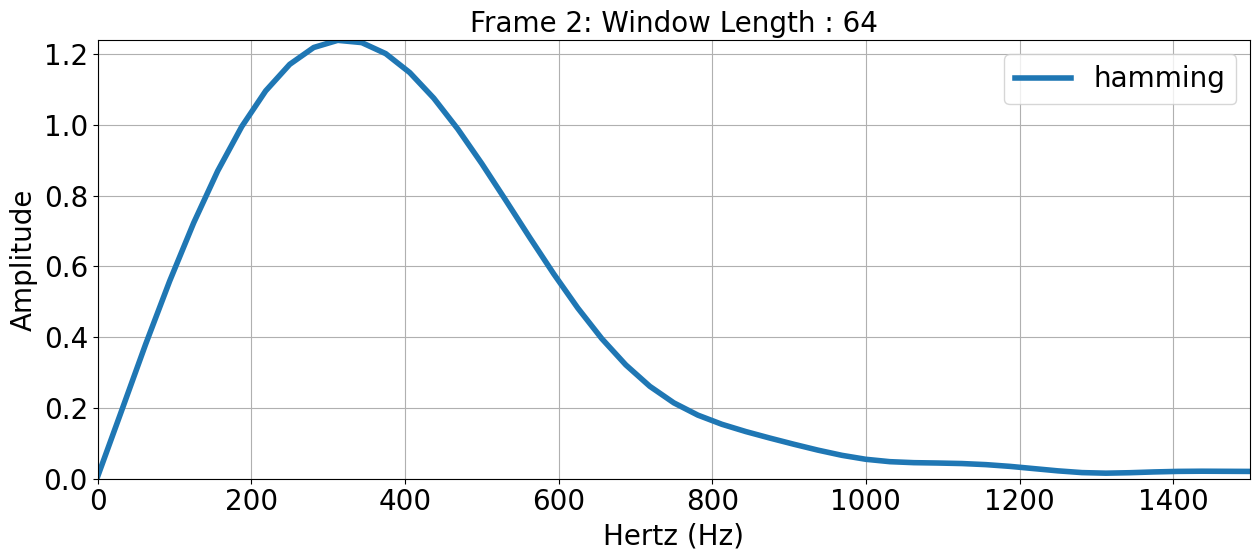

From 18000 samples, total 280 frames are generated
startind: 1408


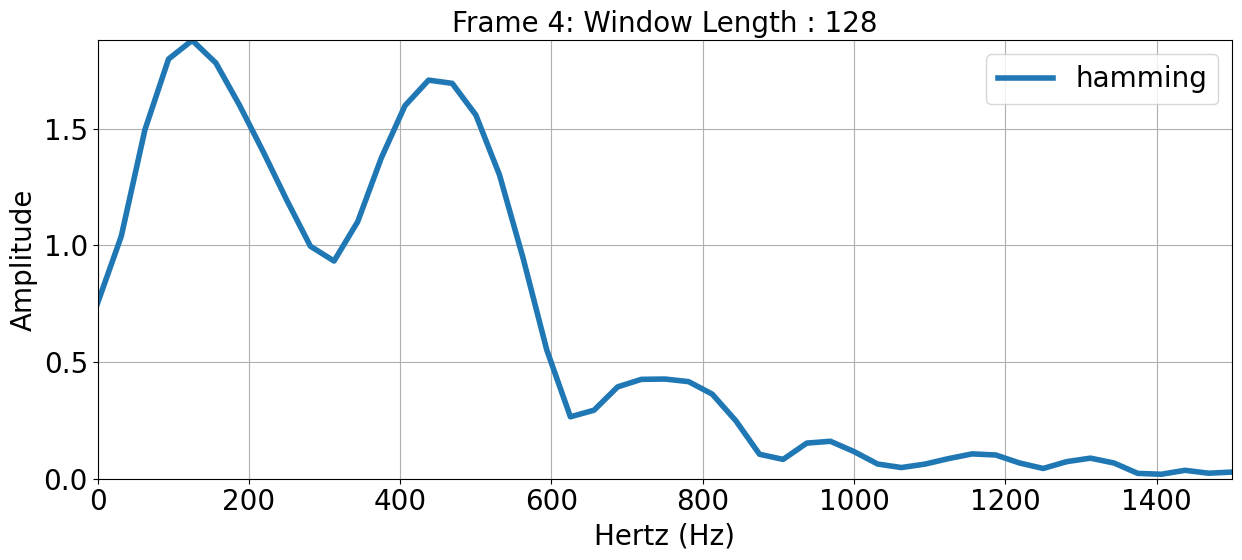

From 18000 samples, total 139 frames are generated
startind: 1280


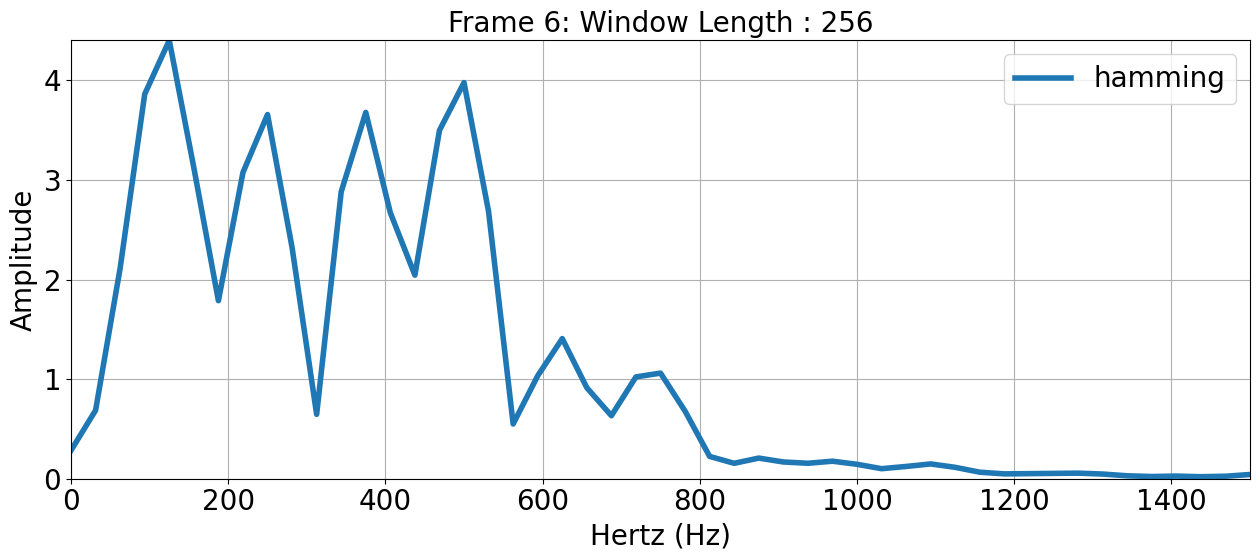

From 18000 samples, total 69 frames are generated
startind: 1024


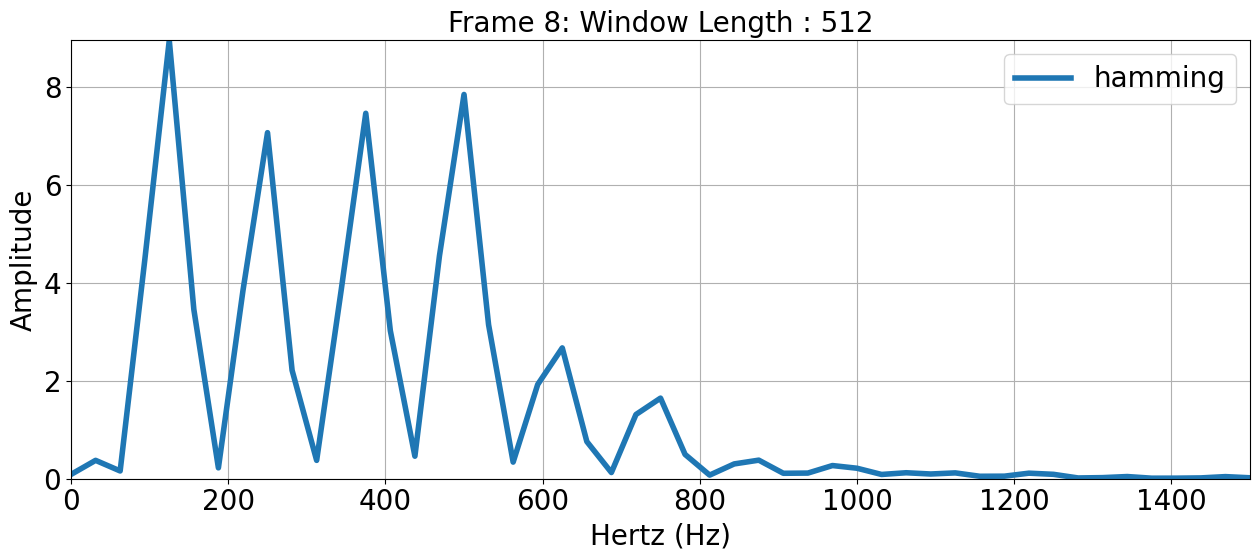

In [16]:
## Hamming Window Case
## 64, 128, 256, 512 win_len으로 하여
## sample index 1500, 5000의 magnitude spectrum을 그려봅시다

win_len = [64,128,256,512]
dftlen=512
sr=16000
FEarr = []
for ii in win_len:
    FEarr.append(utils.FrameExtractor(yr,ii,int(ii/2)) )

# time 축
time = np.arange(0,len(yr)/sr,1/sr)
fn = 1
j=0
maxfreq=0
for i,FE in enumerate(FEarr):
    ####### Index에 해당하는 frame을 추출하고 plot
    frames = FE.extract_frames(win_type="hamming")
    ind1,frame1 = FE.frame_index_finder(1500)
    ind2,frame2 = FE.frame_index_finder(5000)
    # frame1 = frames[ind1]
    # frame2 = frames[ind2]
    startind1 = FE.hop_len * ind1
    endind1 = FE.hop_len * ind1 + FE.win_len
    startind2 = FE.hop_len * ind2
    endind2 = FE.hop_len * ind2 + FE.win_len
    
    print("startind:",startind1)
    # fig,axes = plt.subplots(figsize=(15,4))
    # # 기존 waveform 그리기
    # plt.plot(time,yr, label='waveform')
    # # 추출된 frame 그리기
    # plt.plot(time[startind1: endind1], frame1, label='frame {}'.format(fn), linestyle='--')
    # plt.plot(time[startind2: endind2], frame2, label='frame {}'.format(fn+1), linestyle='--')
    # axes.set_xlabel('Time(s)', fontsize=14, fontweight='bold')
    # axes.set_ylabel('Amplitude', fontsize=14, fontweight='bold')
    # axes.set_title('Waveform and Extracted Frames', fontsize=16, fontweight='bold')
    # axes.tick_params(axis='both', labelsize=14)
    # axes.set_xlim(0, time[-1])
    # axes.legend()
    # axes.grid()
    # fn += 2
    
    #######
    ####### Frame의 time plot 확대해서 그리기
    # plt.plot()
    # if i==3:
    # ####### Frame 의 time plot와 Magnitude Spectrum 그리기
    #     plt.figure(figsize=[7,3])
    #     # plt.subplot(2,2,1)
    #     plt.plot(frame1,color='orange')
    #     plt.grid()
    #     plt.xlim(0,len(frame1)-1)
    #     plt.title("Unvoiced Region (Frame 7)",fontsize=20, fontweight='bold')
    #     plt.xlabel("Samples",fontsize=15)
    #     plt.tick_params(axis='both', labelsize=15)
        
    #     # plt.subplot(2,2,2)
    #     plt.figure(figsize=[7,3])
    #     plt.plot(frame2,color='green')
    #     plt.grid()
    #     plt.xlim(0,len(frame2)-1)
    #     plt.title("Voiced Region (Frame 8)",fontsize=20, fontweight='bold')
    #     plt.xlabel("Samples",fontsize=15)
    #     plt.tick_params(axis='both', labelsize=15)

    ###### Magnitude Plot of Frame
    ## FFTSHIFT를 안 하고, 절반만 plot
    frame1 = frame1
    frame2 = frame2
    
    # frame1 = frame1 / np.sum(frame1)
    # frame2 = frame2 / np.sum(frame2)
    
    # frame1 = frame1 / np.sum(np.abs(frame1))
    # frame2 = frame2 / np.sum(np.abs(frame2))
    
    # print(FE.hamm_window)
    # print(np.sum(np.power(FE.hamm_window,2)))
    
    frame1_h = frames[ind1]
    frame2_h = frames[ind2]
    fflist = [(np.fft.fft(ff,dftlen)) for ff in [frame2_h]]
    
    ## fft 결과 : 0 ~ 2pi / freq 결과 : -pi ~ pi
    freqaxis = np.fft.fftshift(np.fft.fftfreq(dftlen,d=1/sr))
    freq = -1*freqaxis[freqaxis<=0][::-1]
    
    # 0 ~ 8000 Hz 만을 추출 (좌우로 뒤집음)
    fig2,axes2= plt.subplots(figsize=(13,6))

    for ii, ff in enumerate(fflist):
        ff = ff[:dftlen//2+1]
        ii=1
        if np.max(np.abs(ff)) > maxfreq:
            maxfreq = np.max(np.abs(ff))
        if ii == 0:
            axes2.plot(freq, np.abs(ff), label='rect', linewidth=4)  # rect에 대한 label
        elif ii == 1:
            axes2.plot(freq, np.abs(ff), label='hamming', linewidth=4)  # hamming에 대한 label

    axes2.set_ylabel("Amplitude", fontsize=20)
    axes2.set_xlabel("Hertz (Hz)", fontsize=20)
    axes2.tick_params(axis='both', labelsize=20)
    axes2.set_xlim(0, 1500)
    axes2.grid()
    axes2.legend(fontsize=20)  # legend 폰트 크기 조절
    axes2.set_title("Frame {}: Window Length : {}".format(2*i+2,win_len[i]), fontsize=20)
    axes2.set_ylim(0,maxfreq)
    plt.show()
    

# ###### 확대된 주파수 스펙트럼
# plt.figure(figsize=(8,6))
# t1= np.abs(ff[:45])
# peak_freq = freq[np.argmax(t1)]
# # 그래프 그리기
# print(t1.shape)
# print(t1)
# plt.plot(freq[0:45], t1, label='rect', linewidth=2)
# plt.scatter(peak_freq, np.max(t1), color='red', label=f'Peak at {peak_freq:.2f} Hz')
# plt.xlim(0,freq[44])
# print(peak_freq)
# plt.axvline(x=peak_freq, color='gray', linestyle='--')
# plt.legend(fontsize=15)
# plt.ylabel("Amplitude", fontsize=20)
# plt.xlabel("Hertz (Hz)", fontsize=20)
# plt.xticks([0, 125, 250, 375, 500, 625, 750, 875, 1000, 1125])
# plt.tick_params(axis='both', labelsize=15)
# plt.show()
    




From 18000 samples, total 561 frames are generated
startind: 1440
From 18000 samples, total 280 frames are generated
startind: 1408
From 18000 samples, total 139 frames are generated
startind: 1280
From 18000 samples, total 69 frames are generated
startind: 1024


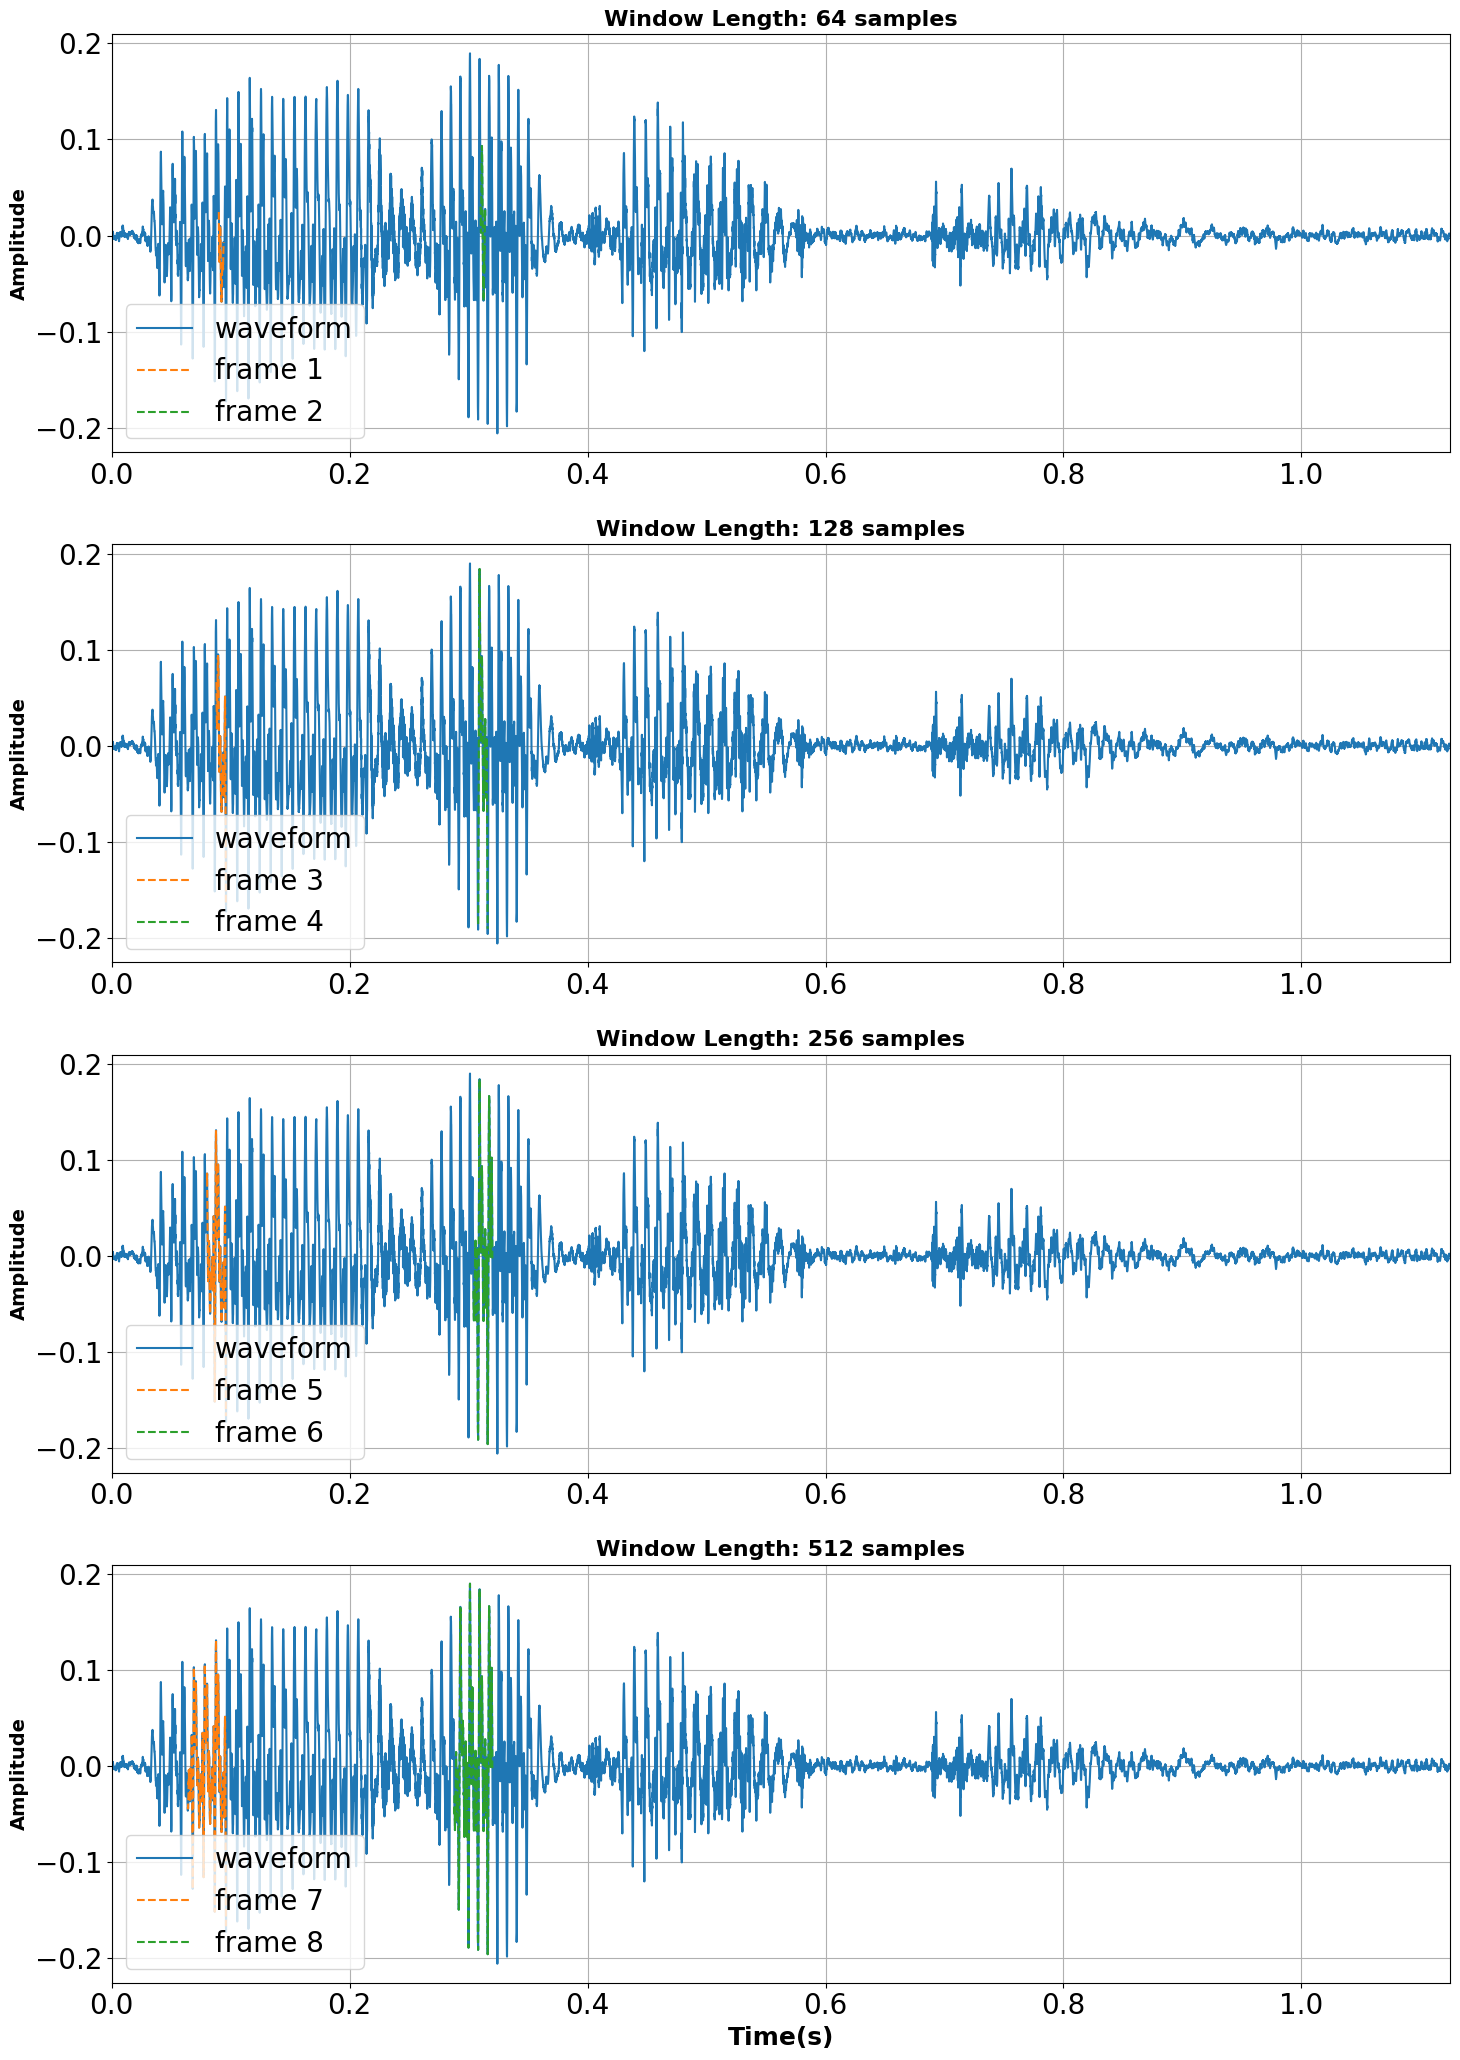

In [23]:
########## Plot of Voiced / Unvoiced Frames
## Index Find & plot with various window length

import numpy as np
import matplotlib.pyplot as plt

win_len = [64, 128, 256, 512]
dftlen = 512
sr = 16000
FEarr = [FrameExtractor(yr, ii, int(ii/2)) for ii in win_len]

# time 축
time = np.arange(0, len(yr)/sr, 1/sr)

fig, axes = plt.subplots(len(FEarr), 1, figsize=(15, 4*len(FEarr)+5))
# fig2, axes2 = plt.subplots(len(FEarr), 1, figsize=(15, 4*len(FEarr)))
axes[0].set_title('Waveform and Extracted Frames', fontsize=25, fontweight='bold')
for i, FE in enumerate(FEarr):
    ####### Index에 해당하는 frame을 추출하고 plot
    frames = FE.extract_frames(win_type="hamming")
    ind1, frame1 = FE.frame_index_finder(1500)
    ind2, frame2 = FE.frame_index_finder(5000)
    startind1 = FE.hop_len * ind1
    endind1 = FE.hop_len * ind1 + FE.win_len
    startind2 = FE.hop_len * ind2
    endind2 = FE.hop_len * ind2 + FE.win_len
    
    print("startind:", startind1)
    
    # 기존 waveform 그리기
    axes[i].plot(time, yr, label='waveform')
    
    # 추출된 frame 그리기
    axes[i].plot(time[startind1: endind1], frame1, label='frame {}'.format(2*i + 1), linestyle='--')
    axes[i].plot(time[startind2: endind2], frame2, label='frame {}'.format(2*i + 2), linestyle='--')
    
    axes[3].set_xlabel('Time(s)', fontsize=18, fontweight='bold')
    axes[i].set_ylabel('Amplitude', fontsize=14, fontweight='bold')
    axes[i].set_title('Window Length: {} samples'.format(win_len[i]), fontsize=16, fontweight='bold')
    axes[i].tick_params(axis='both', labelsize=20)
    axes[i].set_xlim(0, time[-1])
    
    # axes[i].set_ylim(-0.03, 0.03)
    # axes[i].set_xlim(0.25, 0.35)

    axes[i].legend(fontsize=20,loc='lower left')
    axes[i].grid()
    
    # plt.figure(figsize=[15,6])
    # plt.subplot(2,2,1)
    # plt.plot(frame1)
    # plt.grid()
    # plt.xlim(0,len(frame1)-1)
    # plt.title("Unvoiced")
    # plt.xlabel("Samples")
    # plt.subplot(2,2,2)
    # plt.plot(frame2)
    # plt.grid()
    # plt.xlim(0,len(frame2)-1)
    # plt.title("voiced")
    # plt.xlabel("Samples")

# plt.tight_layout()  # subplot 간의 간격 조절
plt.show()


In [ ]:
# #### DFT Length

# win_len = [512]
# dftlen=1024
# sr=16000
# FEarr = []
# for ii in win_len:
#     FEarr.append(FrameExtractor(yr,ii,int(ii/2)) )

# # time 축
# time = np.arange(0,len(yr)/sr,1/sr)
# fn = 1
# j=0
# maxfreq=0
# for i,FE in enumerate(FEarr):
#     ####### Index에 해당하는 frame을 추출하고 plot
#     frames = FE.extract_frames(win_type="hamming")
#     ind1,frame1 = FE.frame_index_finder(1500)
#     ind2,frame2 = FE.frame_index_finder(5000)

#     startind1 = FE.hop_len * ind1
#     endind1 = FE.hop_len * ind1 + FE.win_len
#     startind2 = FE.hop_len * ind2
#     endind2 = FE.hop_len * ind2 + FE.win_len
    
#     print("startind:",startind1)
#     ###### Magnitude Plot of Frame
#     ## FFTSHIFT를 안 하고, 절반만 plot
#     frame1 = frame1
#     frame2 = frame2
    
#     frame1_h = frames[ind1]
#     frame2_h = frames[ind2]
#     fflist = [(np.fft.fft(ff,dftlen)) for ff in [frame2,frame2_h]]
    
#     ## fft 결과 : 0 ~ 2pi / freq 결과 : -pi ~ pi
#     freqaxis = np.fft.fftshift(np.fft.fftfreq(dftlen,d=1/sr))
#     freq = -1*freqaxis[freqaxis<=0][::-1]
    
#     # 0 ~ 8000 Hz 만을 추출 (좌우로 뒤집음)
#     fig2,axes2= plt.subplots(figsize=(13,6))

#     for ii, ff in enumerate(fflist):
#         ff = ff[:dftlen//2+1]
#         # ii=1
#         if np.max(np.abs(ff)) > maxfreq:
#             maxfreq = np.max(np.abs(ff))
#         if ii == 0:
#             t1 = np.abs(ff)
#             t1 = 10 * np.log10(t1)
#             axes2.plot(freq, t1, label='rect', linewidth=4)  # rect에 대한 label
#             # axes2.magnitude_spectrum(ff, Fs=sr, scale='dB',label='rect', color='b')  # dB 스케일로 표기
#         elif ii == 1:
#             t2 = np.abs(ff)
#             t2 = 10 * np.log10(t2)
#             axes2.plot(freq, t2, label='hamming', linewidth=4)  # hamming에 대한 label
#             # axes2.magnitude_spectrum(ff, Fs=sr, scale='dB',label='hamming', color='orange')  # dB 스케일로 표기

#     axes2.set_ylabel("Amplitude (dB)", fontsize=20)
#     axes2.set_xlabel("Hertz (Hz)", fontsize=25)
#     axes2.tick_params(axis='both', labelsize=25)
#     axes2.set_xlim(0, 3000)
#     axes2.grid()
#     axes2.legend(fontsize=20)  # legend 폰트 크기 조절
#     axes2.set_title("Frame 8: DFT Points : {}".format(dftlen), fontsize=20)
#     # axes2.set_title("Frame {}: Window Length : {}".format(2*i+6,win_len[i]), fontsize=20)
#     # axes2.set_ylim(-40,8)
#     plt.show()


In [ ]:
# ### Magnitude Spectrum of Rect and Hamming
# ### win_len == 512
# sr = 16000
# win_len = 512
# dftlen = 4096

# rect = lr.filters.get_window(window="rectangular", Nx=win_len)
# hamm = lr.filters.get_window(window="hamming", Nx=win_len)

# rf = np.fft.fft(rect,dftlen)
# hf = np.fft.fft(hamm,dftlen)

#     ## fft 결과 : 0 ~ 2pi / freq 결과 : -pi ~ pi
# freqaxis = np.fft.fftshift(np.fft.fftfreq(dftlen,d=1/sr))
#     # 0 ~ 8000 Hz 만을 추출 (좌우로 뒤집음)
# freq = -1*freqaxis[freqaxis<=0][::-1]

# fig,axes= plt.subplots(figsize=(13,6))
# rf = rf[:dftlen//2+1]
# hf = hf[:dftlen//2+1]
# rf = np.abs(rf)
# rf = 10 * np.log10(1+rf)
# axes.plot(freq, rf, label='rect', linewidth=3)  # rect에 대한 label
# hf = np.abs(hf)
# hf = 10 * np.log10(1+hf)
# axes.plot(freq, hf, label='hamming', linewidth=3)  # hamming에 대한 label
# axes.legend()
# # axes.set_xlim(0,500)
# axes.set_ylabel("Amplitude (dB)", fontsize=20)
# axes.set_xlabel("Hertz (Hz)", fontsize=20)
# axes.tick_params(axis='both', labelsize=20)
# axes.grid()
# axes.legend(fontsize=25)  # legend 폰트 크기 조절
# axes.set_ylim(0, 28)

# plt.show()


In [ ]:
# ## Rectangular Window Case
# ## 64, 128, 256, 512 win_len으로 하여
# ## sample index 1500, 5000의 magnitude spectrum을 그려봅시다

# win_len = [64, 128, 256, 512]
# dftlen = 512
# FEarr = []
# for ii in win_len:
#     FEarr.append(FrameExtractor(yr,ii,int(ii/2)) )

# for FE in FEarr:
#     frames = FE.extract_frames(win_type="rectangular")
#     ind1 = FE.frame_index_finder(1500)
#     ind2 = FE.frame_index_finder(5000)
#     frame1 = frames[ind1]
#     frame2 = frames[ind2]
    
#     plt.figure(figsize=[15,6])
#     plt.subplot(2,2,1)
#     plt.plot(frame1)
#     plt.title("Unvoiced")
#     plt.xlabel("Samples")
#     plt.subplot(2,2,2)
#     plt.plot(frame2)
#     plt.title("voiced")
#     plt.xlabel("Samples")

    
#     fflist = [np.fft.fftshift(np.fft.fft(ff,dftlen)) for ff in [frame1,frame2]]
#     freq1 = np.fft.fftshift(np.fft.fftfreq(dftlen,d=1/sr))
#     j=3
#     for ff in fflist:
#         plt.subplot(2,2,j)
#         j+=1
#         plt.plot(freq1,np.abs(ff))
#         plt.xlabel("Hertz (Hz)")
#     plt.show()

# Short-Time Fourier Transform

N_FFT :  512


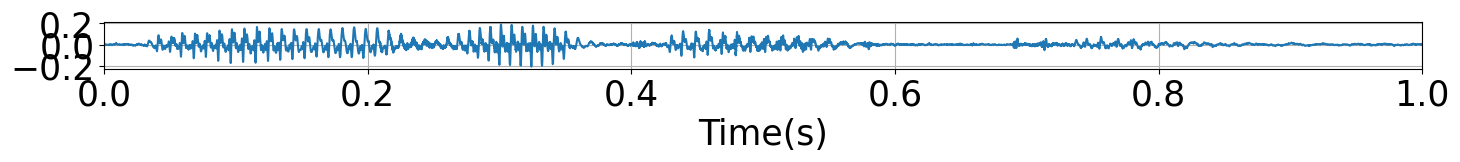

From 18000 samples, total 561 frames are generated
(257, 561)


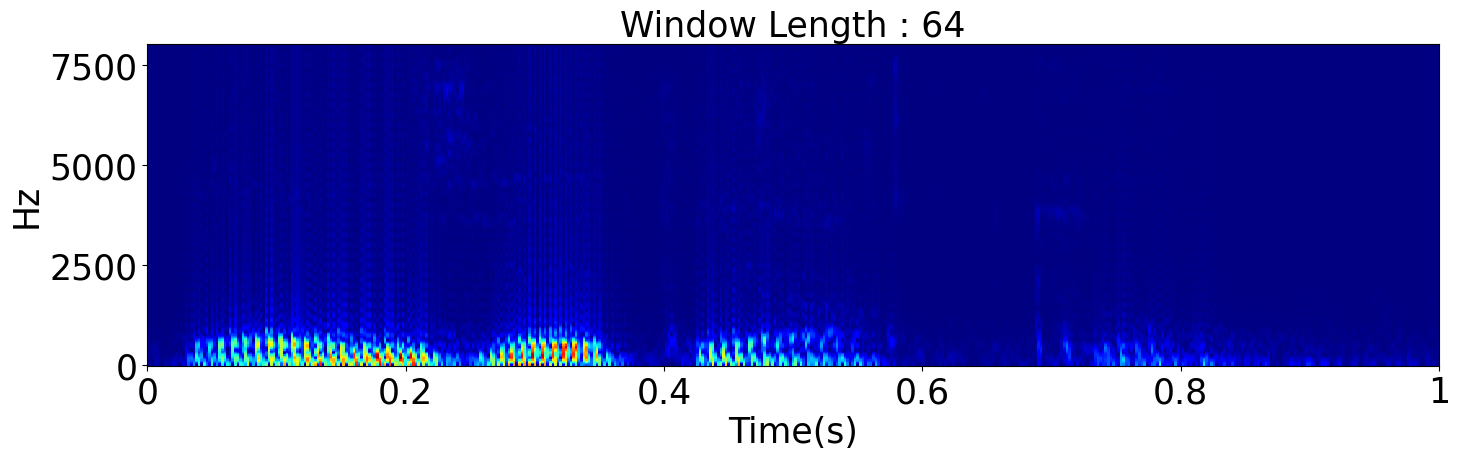

From 18000 samples, total 280 frames are generated
(257, 280)


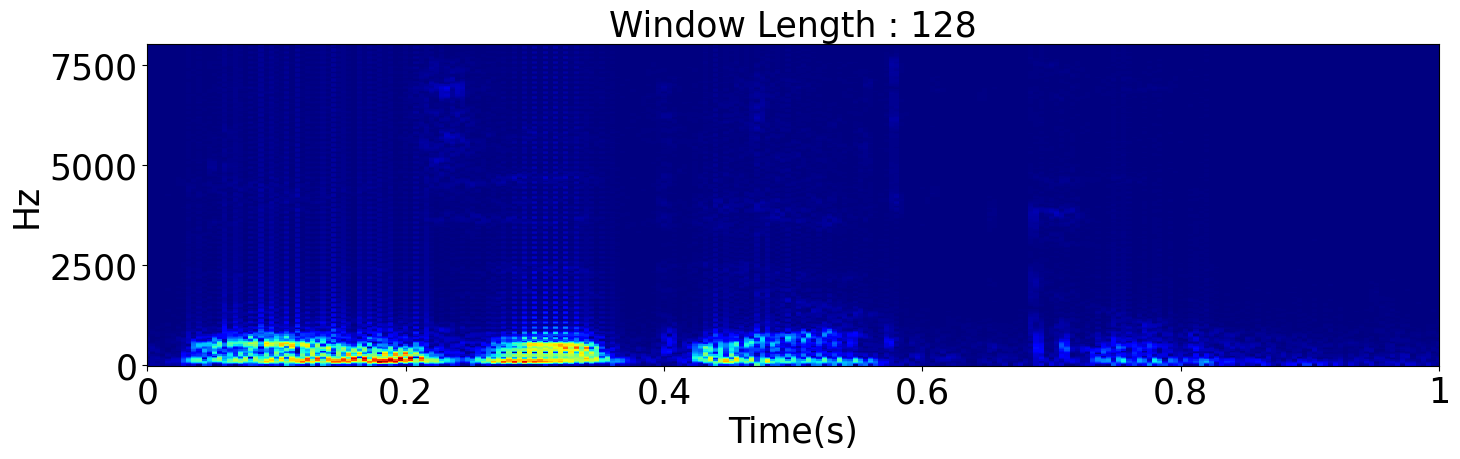

From 18000 samples, total 139 frames are generated
(257, 139)


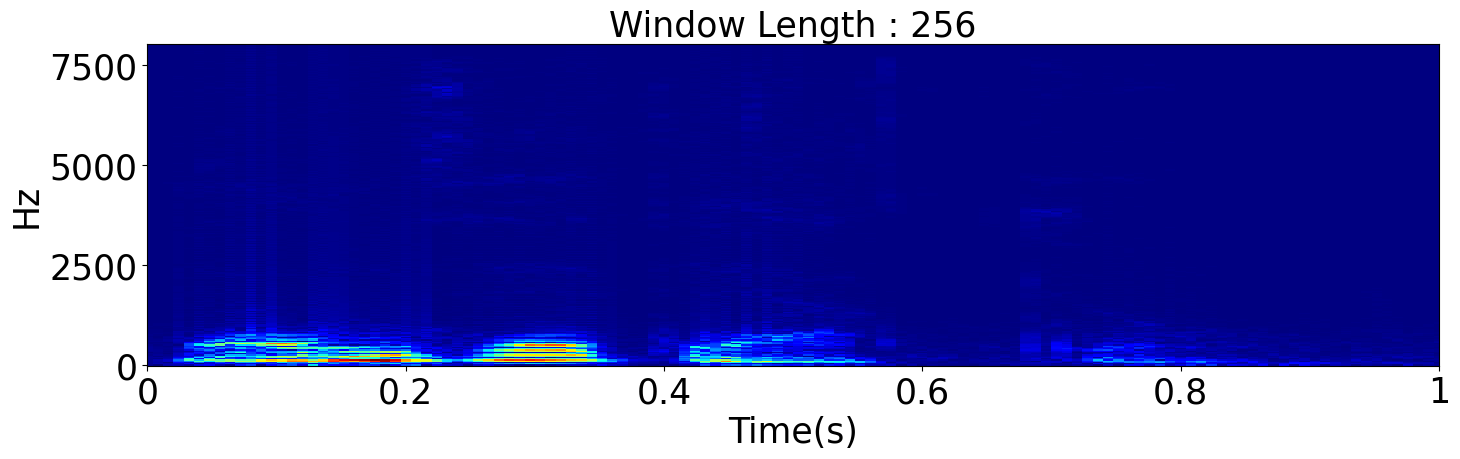

From 18000 samples, total 69 frames are generated
(257, 69)


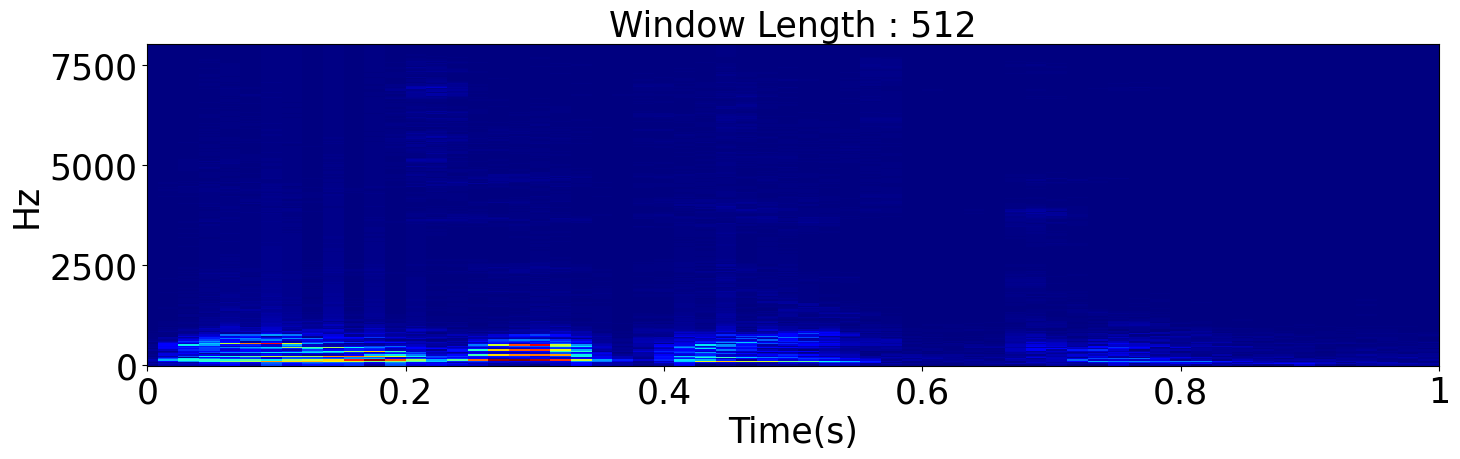

(257, 69)


In [ ]:
###### Spectrogram of yr : yonsei

winlenlist = [64, 128, 256, 512]
print("N_FFT : ",dftlen)
p2=plt.figure(figsize=(15,2))
time = np.arange(0,len(yr)/sr,1/sr)
plt.plot(time,yr)
plt.xlim(time[0], 1.0)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.xlabel("Time(s)",fontsize=25)
plt.tick_params(axis='both',labelsize=25)
plt.grid()
plt.show()


## Mel Filter banks
melfb = lr.filters.mel(sr=16000, n_fft=512, fmax=8000, n_mels=80)
for i,winlen in enumerate(winlenlist) :
    FE = utils.FrameExtractor(yr, winlen, int(winlen/2))
    
    specgram = FE.STFT(win_type="rectangular")

    print(specgram.shape)
    # plt.figure(figsize=(15,5))
    # specgram = 20 * np.log10(specgram)\
    specgram = np.flipud(specgram)    
    specgram = np.abs(specgram)
    # specgram=lr.amplitude_to_db(np.abs(specgram), ref=np.max)
    
    fig,ax = plt.subplots(sharex=True,figsize=(15,5))
    # ax.imshow(specgram, extent=(0,len(yr)/sr, 0, sr/2), aspect='auto')
    img=lr.display.specshow(specgram, sr=sr, ax=ax, hop_length=int(winlen/2), x_axis='time', y_axis='hz', cmap='jet')
    ax.set_xlim(0,1.0)
    ax.set_xlabel("Time(s)", fontsize=25)
    ax.set_ylabel("Hz",fontsize=25)
    ax.tick_params(axis="both",labelsize=25)
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_title("Window Length : {}".format(winlen),fontsize=25)
    # cbar=plt.colorbar(img,format="%+2.f dB",pad=0.02,ax=ax)
    # cbar.ax.tick_params(labelsize=14)
    plt.show()

    
    # STFT Using Librosa

melfb = lr.filters.mel(sr=16000, n_fft=512, fmax=8000, n_mels=80)

print(specgram.shape)

In [ ]:
# MEL Spectrogram

import scipy

winlenlist = [64, 128, 256, 512]
print("N_FFT : ",dftlen)
p2=plt.figure(figsize=(15,2))
time = np.arange(0,len(yr)/sr,1/sr)
plt.plot(time,yr)
plt.xlim(time[0], 1.0)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.xlabel("Time(s)")
plt.grid()
plt.show()


## Mel Filter banks
melfb = lr.filters.mel(sr=16000, n_fft=512, fmax=8000, n_mels=80)
for i,winlen in enumerate(winlenlist) :
    FE = FrameExtractor(yr, winlen, int(winlen/2))
    
    specgram = FE.STFT(win_type="rectangular")

    print(specgram.shape)
    # plt.figure(figsize=(15,5))
    # specgram = 20 * np.log10(specgram)\
    specgram = np.abs(np.flipud(specgram))      
    melspec = np.matmul(melfb, np.power(specgram,2))
    melspec = lr.power_to_db(melspec)
    
    M: np.ndarray = scipy.fftpack.dct(melspec, axis=0, type=2, norm=None)[
        ..., :20, :]
    
    fig,ax = plt.subplots(sharex=True,figsize=(15,5))
    # ax.imshow(specgram, extent=(0,len(yr)/sr, 0, sr/2), aspect='auto')
    
    print(M.shape)
    # img = lr.display.specshow(M, x_axis='time',cmap='jet')
    img=lr.display.specshow(melspec, sr=sr, ax=ax, hop_length=int(winlen/2), x_axis='time', y_axis='mel', cmap='jet')
    ax.set_xlim(0,1.0)
    ax.set_xlabel("Time(s)", fontsize=25)
    ax.set_ylabel("Hz",fontsize=25)
    # ax.set_ylabel("MFCC Coefficients",fontsize=25)

    ax.tick_params(axis="both",labelsize=25)
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_title("Window Length : {}".format(winlen),fontsize=25)
    cbar=plt.colorbar(img,pad=0.02,ax=ax)
    # cbar=plt.colorbar(img,format="%+2.f dB",pad=0.02,ax=ax)
    cbar.ax.tick_params(labelsize=14)

    plt.show()


#     # STFT Using Librosa

# mfcc = lr.feature.mfcc(y=y,sr=sr,n_fft=512,win_length=256, hop_length=128)

# print(mfcc)
# print(mfcc.shape)

# S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,n_fft=512,win_length=256, hop_length=128,
#                                    fmax=8000)

# print(S.shape)
# S = librosa.power_to_db(S)
# cc = librosa.feature.mfcc(S=librosa.power_to_db(S))
M: np.ndarray = scipy.fftpack.dct(S, axis=-2, type=2, norm=None)[
        ..., :20, :
    ]

# print(M.shape)
# img = librosa.display.specshow(M, x_axis='time')

# Mel Filterbank

In [ ]:
# Plot Mel-Filter bank

## melfb
## shape -> (n_mels, 주파수성분수)
melfb = lr.filters.mel(sr=16000, n_fft=512, fmax=8000, n_mels=80)

print(melfb.shape)

fig, ax = plt.subplots()
img = lr.display.specshow(melfb,x_axis="linear",ax=ax)
ax.set(ylabel='Mel filter', title='Mel filter bank')
fig.colorbar(img,ax=ax)

x = np.arange(1,8000)
print(x)
y = 1127 * np.log(1 + x/700)

plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.xlim(0,8000)
plt.grid()
plt.ylim(0,y[-1])
plt.xlabel("Frequency (Hz)", fontsize=25)
plt.ylabel("Mels",fontsize=25)
plt.tick_params(axis='both',labelsize=20)
plt.show()

## MFCC

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
import scipy

plt.figure(figsize=(10,5))
y, sr = librosa.load(librosa.ex('libri1'))
mfcc = librosa.feature.mfcc(y=y,sr=sr,n_fft=512,win_length=256, hop_length=128)

print(mfcc)
print(mfcc.shape)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,n_fft=512,win_length=256, hop_length=128,
                                   fmax=8000)

print(S.shape)
S = librosa.power_to_db(S)
cc = librosa.feature.mfcc(S=librosa.power_to_db(S))
M: np.ndarray = scipy.fftpack.dct(S, axis=-2, type=2, norm=None)[
        ..., :20, :
    ]

print(M.shape)
img = librosa.display.specshow(M, x_axis='time',cmap='jet')
plt.colorbar(img)
plt.show()